In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
path_df = '/content/gdrive/My Drive/shahr_sazi.xlsx'
df = pd.read_excel(path_df)
df.head()

ماه  منطقه 1  منطقه 2  منطقه 3  ...  منطقه 10  منطقه 11  منطقه 12  منطقه ثامن
0  2014-3       28       59       32  ...        31        34        31         1.0
1  2014-4       56      111       86  ...        69        38        47         NaN
2  2014-5       41       88      110  ...        21        29        42         2.0
3  2014-6       41       67       54  ...        25        40        31         NaN
4  2014-7       20       65       41  ...        37        31        19         1.0

[5 rows x 14 columns]

In [ ]:
# rename columns
df = df.rename(columns={"منطقه 1" : "Area_1", "منطقه 2":"Area_2", "ماه":"month", "منطقه 3":"Area_3", "منطقه 4":"Area_4",
                       "منطقه 5" : "Area_5", "منطقه 6": "Area_6", "منطقه 7":"Area_7", "منطقه 8":"Area_8", "منطقه 9":"Area_9"
                       , "منطقه 10" : "Area_10", "منطقه 11" : "Area_11", "منطقه 12" : "Area_12" , "منطقه ثامن" : "Samen_area"})

In [ ]:
df['month'] = pd.to_datetime(df['month'])

In [ ]:
df.head()

month  Area_1  Area_2  Area_3  ...  Area_10  Area_11  Area_12  Samen_area
0 2014-03-01      28      59      32  ...       31       34       31         1.0
1 2014-04-01      56     111      86  ...       69       38       47         NaN
2 2014-05-01      41      88     110  ...       21       29       42         2.0
3 2014-06-01      41      67      54  ...       25       40       31         NaN
4 2014-07-01      20      65      41  ...       37       31       19         1.0

[5 rows x 14 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   month       72 non-null     datetime64[ns]
 1   Area_1      72 non-null     int64         
 2   Area_2      72 non-null     int64         
 3   Area_3      72 non-null     int64         
 4   Area_4      72 non-null     int64         
 5   Area_5      72 non-null     int64         
 6   Area_6      72 non-null     int64         
 7   Area_7      72 non-null     int64         
 8   Area_8      72 non-null     int64         
 9   Area_9      72 non-null     int64         
 10  Area_10     72 non-null     int64         
 11  Area_11     72 non-null     int64         
 12  Area_12     72 non-null     int64         
 13  Samen_area  55 non-null     float64       
dtypes: datetime64[ns](1), float64(1), int64(12)
memory usage: 8.0 KB


In [ ]:
df.describe()

Area_1      Area_2      Area_3  ...    Area_11     Area_12  Samen_area
count  72.000000   72.000000   72.000000  ...  72.000000   72.000000   55.000000
mean   21.750000   42.375000   28.208333  ...  29.805556   31.750000    2.672727
std    11.361846   18.803983   17.960785  ...  16.002323   20.265665    4.050855
min     4.000000   12.000000    3.000000  ...   3.000000    9.000000    1.000000
25%    13.000000   29.750000   16.000000  ...  17.000000   19.000000    1.000000
50%    19.500000   41.500000   24.500000  ...  29.000000   25.500000    2.000000
75%    29.250000   53.250000   35.500000  ...  38.250000   37.250000    2.000000
max    56.000000  111.000000  110.000000  ...  74.000000  119.000000   28.000000

[8 rows x 13 columns]

In [ ]:
# missing value tereatment
mean = df['Samen_area'].mean()
std = df["Samen_area"].std()
is_null = df["Samen_area"].isnull().sum()
rand_area = np.random.randint(std - mean, mean + std, size = is_null)
area_slice = df["Samen_area"].copy()
area_slice[np.isnan(area_slice)] = rand_area
df["Samen_area"] = area_slice
df["Samen_area"] = df["Samen_area"].astype(int)
df["Samen_area"].isnull().sum()

0

In [ ]:
df.head()

month  Area_1  Area_2  Area_3  ...  Area_10  Area_11  Area_12  Samen_area
0 2014-03-01      28      59      32  ...       31       34       31           1
1 2014-04-01      56     111      86  ...       69       38       47           3
2 2014-05-01      41      88     110  ...       21       29       42           2
3 2014-06-01      41      67      54  ...       25       40       31           2
4 2014-07-01      20      65      41  ...       37       31       19           1

[5 rows x 14 columns]

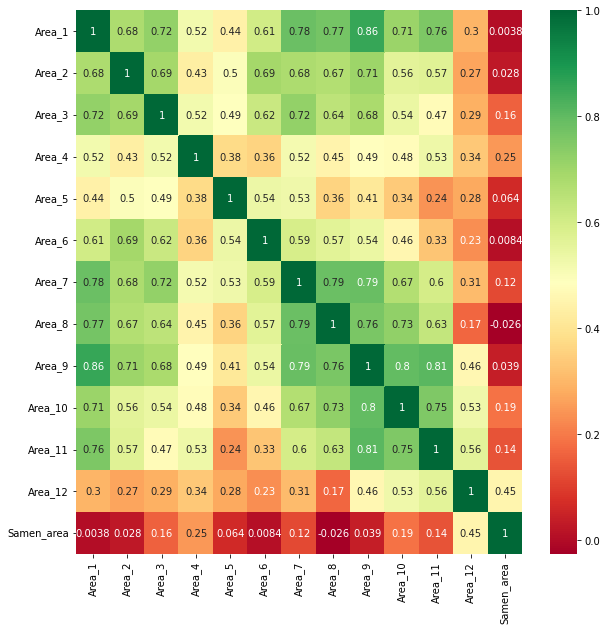

In [ ]:
# Calculate correlation
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize = (10,10))
g = sns.heatmap(df[top_corr_features].corr(),annot= True, cmap = "RdYlGn")
plt.show()

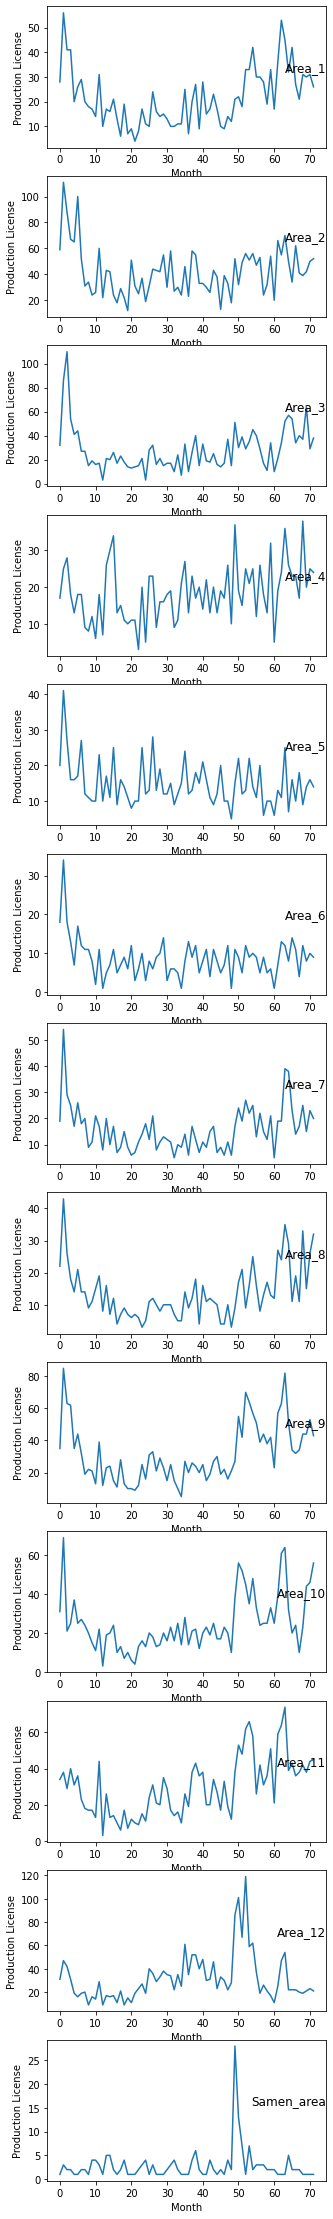

In [ ]:
# visualize datas
value = df.values
groups = range(1,14)
i = 1
plt.figure(figsize = (5,40))
for group in groups:
    plt.subplot(len(groups),1 ,i)
    plt.plot(value[:, group])
    plt.title(df.columns[group], y=0.5, loc = 'right')
    plt.xlabel('Month')
    plt.ylabel('Production License')
    i+=1
plt.show()

In [ ]:
# Split of data into two sets of training and testing
test_size = 68
df_train = df[:test_size]
df_test = df[test_size:]

In [ ]:
df3 = df.copy()
column_1= df3.drop(['month'],axis=1).columns

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


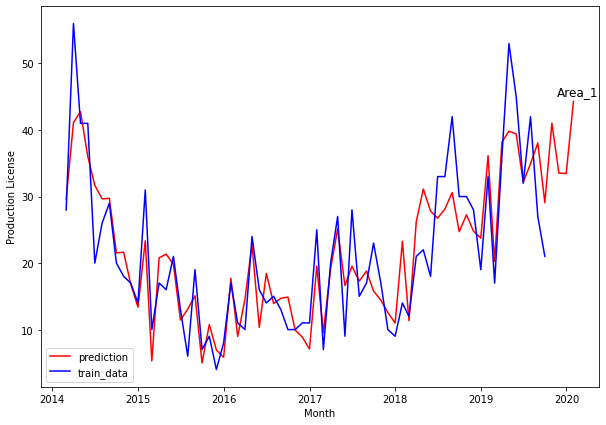

rmse :  34.47594201565107
mae :  4.549909791635304


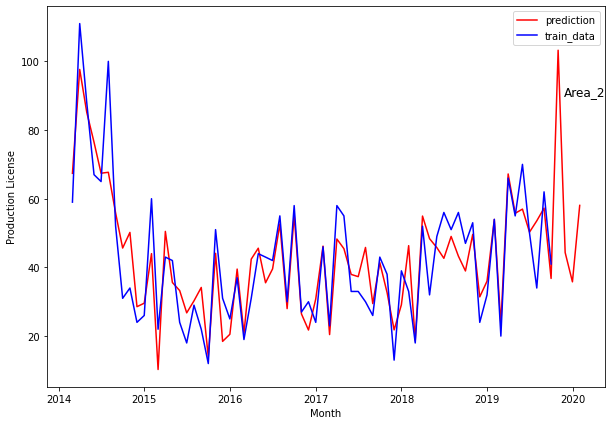

rmse :  137.8245179098274
mae :  7.748460562540739


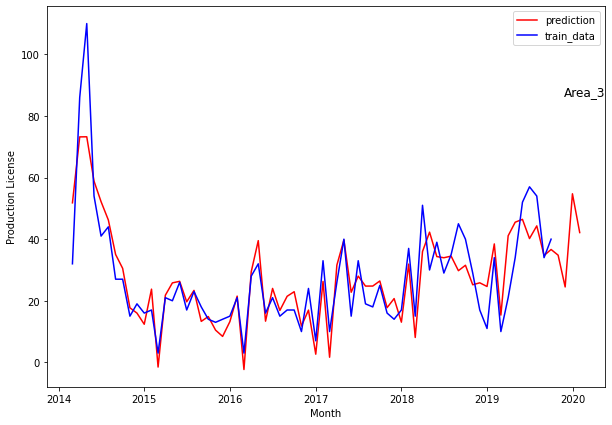

rmse :  101.03985931380824
mae :  6.937710055084553


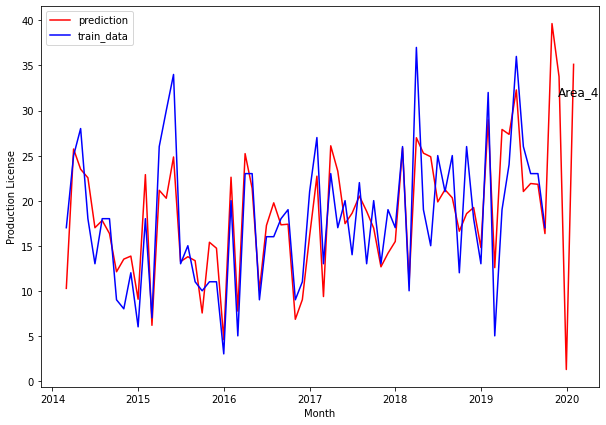

rmse :  29.62432129438598
mae :  3.979609967632267


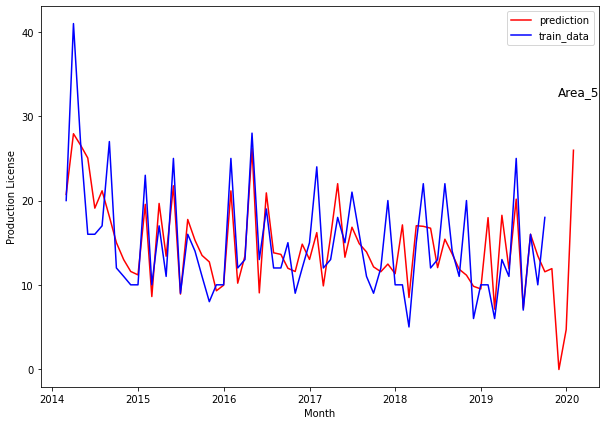

rmse :  22.356140492102263
mae :  3.51061484188608


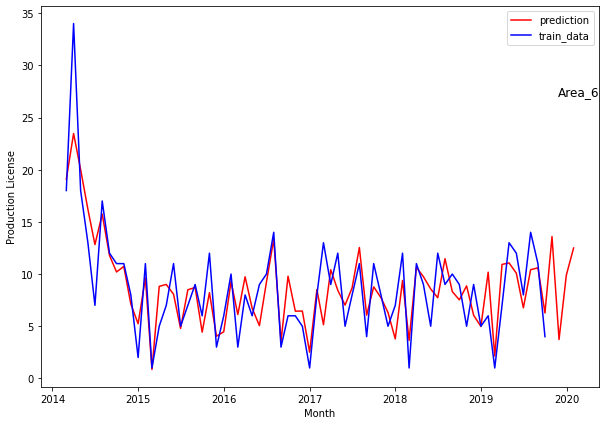

rmse :  7.704790370783674
mae :  2.115849189457636


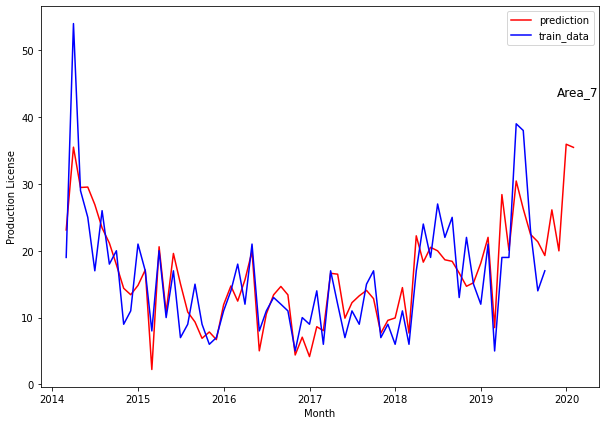

rmse :  28.20030279501441
mae :  3.904305895746456


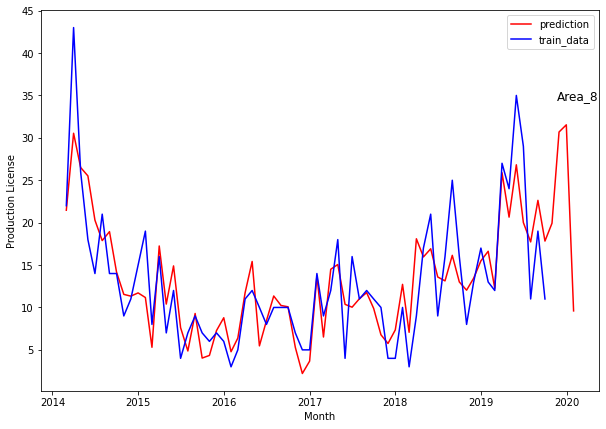

rmse :  29.08728075139018
mae :  3.7396131984861114


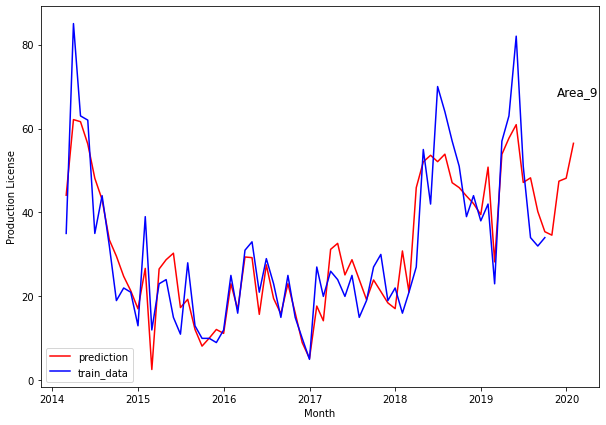

rmse :  63.828738120700955
mae :  5.9660959114833085


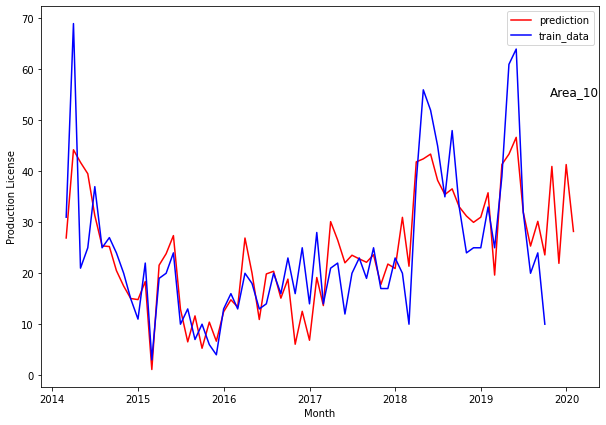

rmse :  77.54355958033676
mae :  6.306944045045651


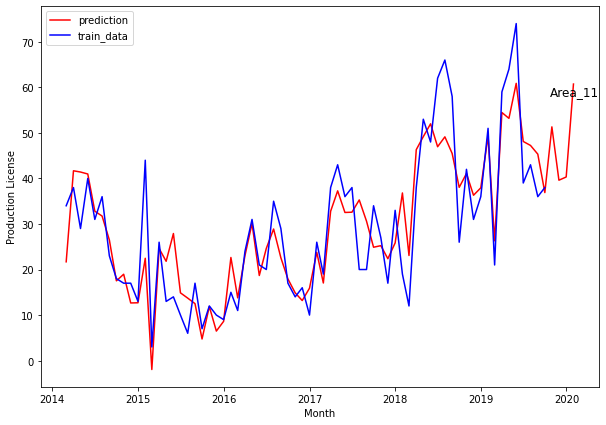

rmse :  60.61008365226829
mae :  6.0384185045746435


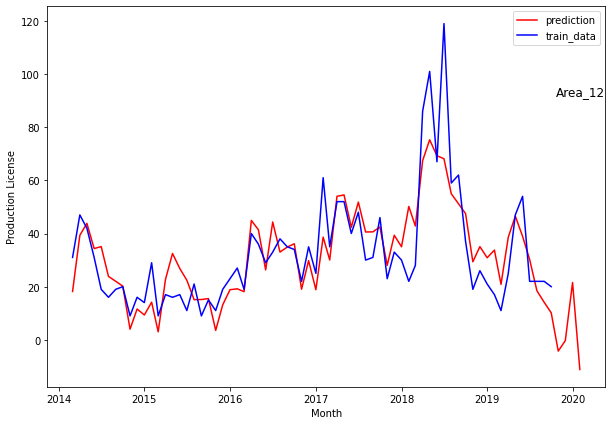

rmse :  153.1193245711926
mae :  9.061490733278362


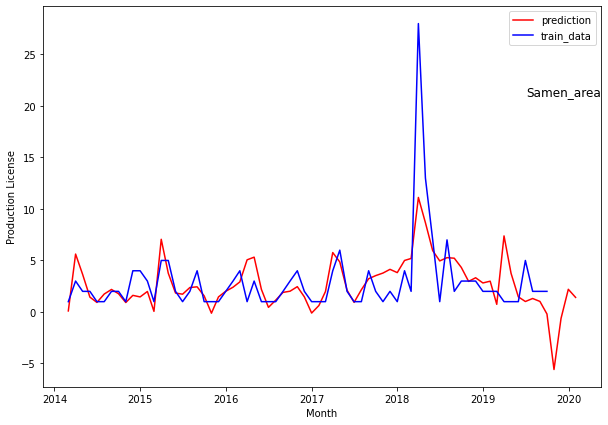

rmse :  7.842490659956575
mae :  1.6588419212504892


In [ ]:
# Prediction with fbprophet
for col in column_1:
    data = df_train.rename(columns = {'month' : 'ds', col : 'y'})
    m = Prophet(changepoint_prior_scale=0.9, weekly_seasonality=False ,daily_seasonality=False )
    m.fit(data)
    future = m.make_future_dataframe(periods = 4, freq='M')
    forecast = m.predict(future)
    plt.figure(figsize=(10,7))
    plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='prediction')
    plt.plot(data['ds'], data['y'], 'b-', label='train_data')
    plt.title(col, y=0.75, loc = "right")
    plt.xlabel('Month')
    plt.ylabel('Production License')
    plt.legend()
    plt.show()
    rmse = mean_squared_error(df[col],forecast['yhat'])
    mae = mean_absolute_error(df[col],forecast['yhat'])
    print('rmse : ', rmse)
    print('mae : ', mae)